# CPE 695 Homework 2

Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

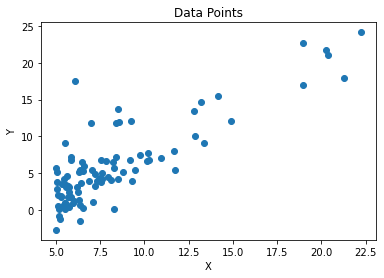

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = np.loadtxt('./Desktop/data2.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]

 Normal equationplt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.show()


 Normal equation

In [7]:
X_b = np.c_[np.ones((len(X), 1)), X]

def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

c = normal_equation(X_b, y)
print('Coefficients from normal equation:', c)


Coefficients from normal equation: [-3.89578088  1.19303364]


Gradient Descent using batch AND stochastic modes respectively:
Split dataset into 80% for training and 20% for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

Plot MSE vs. iteration of the batch mode for both training set and testing set (in the same figure). (You need to determine an appropriate termination condition, e.g., when 
cost function is less than a threshold, and/or after a given number of iterations.)

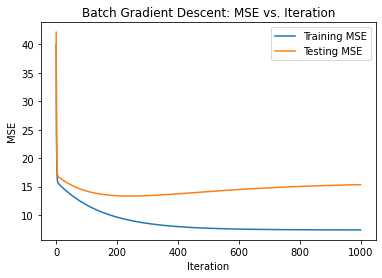

In [37]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    coef = np.random.randn(2)
    mse_train_array = []
    mse_test_array = []
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(coef) - y)
        coef = coef - learning_rate * gradients
        mse_train = np.mean((X_train.dot(coef) - y_train)**2)
        mse_test = np.mean((X_test.dot(coef) - y_test)**2)
        mse_train_array.append(mse_train)
        mse_test_array.append(mse_test)
        if mse_train < 1e-6:
            break
    return coef, mse_train_array, mse_test_array

coef_batch, mse_train_array_batch, mse_test_array_batch = batch_gradient_descent(X_train, y_train)

plt.plot(mse_train_array_batch, label='Training MSE')
plt.plot(mse_test_array_batch, label='Testing MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Batch Gradient Descent: MSE vs. Iteration')
plt.show()


Repeat but using the stochastics mode

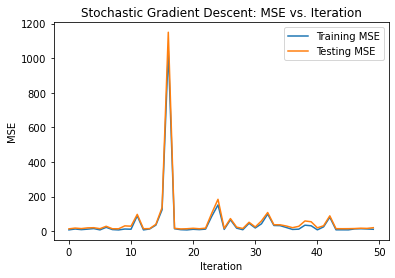

In [38]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    coef = np.random.randn(2)
    mse_train_array = []
    mse_test_array = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(coef) - yi)
            coef = coef - learning_rate * gradients
        mse_train = np.mean((X_train.dot(coef) - y_train)**2)
        mse_test = np.mean((X_test.dot(coef) - y_test)**2)
        mse_train_array.append(mse_train)
        mse_test_array.append(mse_test)
        if mse_train < 1e-6:
            break
    return coef, mse_train_array, mse_test_array

coef_stochastic, mse_train_array_stochastic, mse_test_array_stochastic = stochastic_gradient_descent(X_train, y_train)

plt.plot(mse_train_array_stochastic, label='Training MSE')
plt.plot(mse_test_array_stochastic, label='Testing MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Stochastic Gradient Descent: MSE vs. Iteration')
plt.show()


Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence.

In [39]:
print('Batch Gradient Descent coefficients:', coef_batch)
print('Stochastic Gradient Descent coefficients:', coef_stochastic)

Batch Gradient Descent coefficients: [-4.47977701  1.26166984]
Stochastic Gradient Descent coefficients: [-6.40189036  1.24981468]


In terms of accuracy it can be seen that the SGD model is much more accurate than the Batch GD model and is more generalized. The batch GD model has a fair amount of overfitting as the test data converges quicker than the training data.

Change learning rate and plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01). Based on the plot, determine the best learning rate.

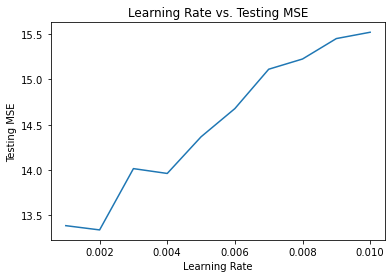

In [41]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
mse_learning_rates = []

for lr in learning_rates:
    _, _, mse_test_array = batch_gradient_descent(X_train, y_train, learning_rate=lr)
    mse_learning_rates.append(mse_test_array[-1])

plt.plot(learning_rates, mse_learning_rates)
plt.xlabel('Learning Rate')
plt.ylabel('Testing MSE')
plt.title('Learning Rate vs. Testing MSE')
plt.show()


According to the plot above, the best learning rate is 0.002 as it has the lowest MSE.